In [173]:
#import data manipulation and visualisations libraries
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

#attributes normalisation
from scipy.stats import boxcox
from sklearn.preprocessing import StandardScaler

#encoder
from sklearn import preprocessing

#import ML libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

#import model evaluation libraries
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [174]:


#load data from csv file
data = pd.read_csv('possum.csv')



## Exploratory Data Analysis

    Understand dataset variables
    Clean dataset
    Plot dataset variables
    Analyze relationships between variables


In [175]:
data.head(5)

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


In [176]:
#number of rows and attributes
data.shape

(104, 14)

In [177]:
#names of all present attributes in the dataset
data.columns

Index(['case', 'site', 'Pop', 'sex', 'age', 'hdlngth', 'skullw', 'totlngth',
       'taill', 'footlgth', 'earconch', 'eye', 'chest', 'belly'],
      dtype='object')

In [178]:
#datatypes of all present attributes in the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   case      104 non-null    int64  
 1   site      104 non-null    int64  
 2   Pop       104 non-null    object 
 3   sex       104 non-null    object 
 4   age       102 non-null    float64
 5   hdlngth   104 non-null    float64
 6   skullw    104 non-null    float64
 7   totlngth  104 non-null    float64
 8   taill     104 non-null    float64
 9   footlgth  103 non-null    float64
 10  earconch  104 non-null    float64
 11  eye       104 non-null    float64
 12  chest     104 non-null    float64
 13  belly     104 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 11.5+ KB


In [179]:
#number of distinct elements in each attribute
data.nunique(axis=0)

case        104
site          7
Pop           2
sex           2
age           9
hdlngth      71
skullw       64
totlngth     34
taill        19
footlgth     75
earconch     69
eye          35
chest        19
belly        24
dtype: int64

In [180]:
#statistic metrics for continuous variables without scientific notation
data.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

,case,site,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
count,104.000000,104.000000,102.000000,104.000000,104.000000,104.000000,104.000000,103.000000,104.000000,104.000000,104.000000,104.000000
mean,52.500000,3.625000,3.833333,92.602885,56.883654,87.088462,37.009615,68.459223,48.130769,15.046154,27.000000,32.586538
std,30.166206,2.349086,1.909244,3.573349,3.113426,4.310549,1.959518,4.395306,4.109380,1.050374,2.045597,2.761949
min,1.000000,1.000000,1.000000,82.500000,50.000000,75.000000,32.000000,60.300000,40.300000,12.800000,22.000000,25.000000
25%,26.750000,1.000000,2.250000,90.675000,54.975000,84.000000,35.875000,64.600000,44.800000,14.400000,25.500000,31.000000
50%,52.500000,3.000000,3.000000,92.800000,56.350000,88.000000,37.000000,68.000000,46.800000,14.900000,27.000000,32.500000
75%,78.250000,6.000000,5.000000,94.725000,58.100000,90.000000,38.000000,72.500000,52.000000,15.725000,28.000000,34.125000
max,104.000000,7.000000,9.000000,103.100000,68.600000,96.500000,43.000000,77.900000,56.200000,17.800000,32.000000,40.000000


In [181]:
#check discrete variables 
data.Pop.unique()

array(['Vic', 'other'], dtype=object)

### Cleaning dataset

In [182]:
#drop redundant attributes
data = data.drop(labels=['case'], axis=1)

In [183]:
#rename attributes: Pop and site
data = data.rename(columns={'Pop':'population_area', 'site':'site_of_recording'})

In [184]:
#replace values for better readability
data.replace(to_replace={'Vic':'Victoria','m':'male','f':'female'}, inplace=True)

In [185]:
#how many missing values do we have?
total_cells = np.product(data.shape) #product function multiplies all elements in input, in this case 104 rows xs 14 columns)
total_missing_values = (data.isnull().sum()).sum()
print(total_missing_values)
# percent of data that is missing
percent_missing = (total_missing_values/total_cells) * 100

print('\nMissing data make up only ' + str(round(percent_missing, 2)) + ' %.')

3

Missing data make up only 0.22 %.


In [186]:
#dropping missing data
data.dropna(axis=0,inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 101 entries, 0 to 103
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   site_of_recording  101 non-null    int64  
 1   population_area    101 non-null    object 
 2   sex                101 non-null    object 
 3   age                101 non-null    float64
 4   hdlngth            101 non-null    float64
 5   skullw             101 non-null    float64
 6   totlngth           101 non-null    float64
 7   taill              101 non-null    float64
 8   footlgth           101 non-null    float64
 9   earconch           101 non-null    float64
 10  eye                101 non-null    float64
 11  chest              101 non-null    float64
 12  belly              101 non-null    float64
dtypes: float64(10), int64(1), object(2)
memory usage: 11.0+ KB


### Plot dataset attributes

C:\Users\Victoria.Zanella\AppData\Local\Temp\ipykernel_3200\864830919.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x = data[feature], data = data, order = data[feature].value_counts().index, palette = palette)


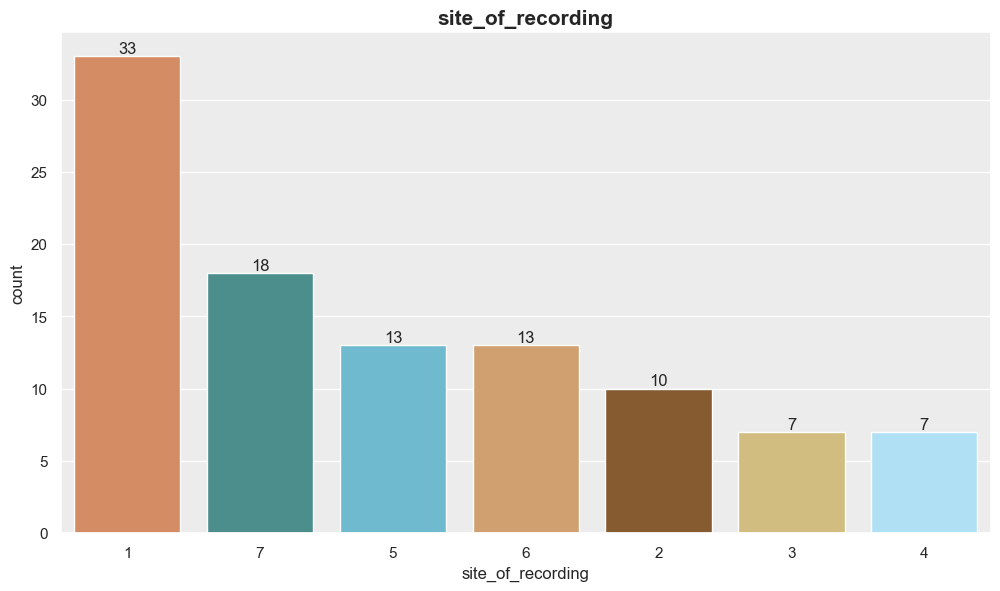

C:\Users\Victoria.Zanella\AppData\Local\Temp\ipykernel_3200\864830919.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x = data[feature], data = data, order = data[feature].value_counts().index, palette = palette)
C:\Users\Victoria.Zanella\AppData\Local\Temp\ipykernel_3200\864830919.py:10: UserWarning: The palette list has more values (7) than needed (2), which may not be intended.
  ax = sns.countplot(x = data[feature], data = data, order = data[feature].value_counts().index, palette = palette)


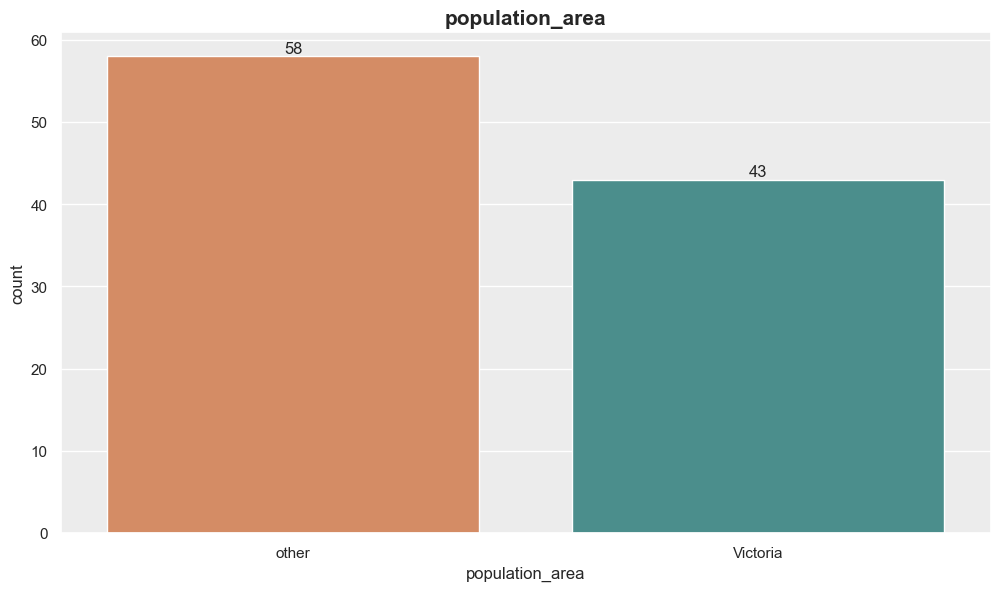

C:\Users\Victoria.Zanella\AppData\Local\Temp\ipykernel_3200\864830919.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x = data[feature], data = data, order = data[feature].value_counts().index, palette = palette)
C:\Users\Victoria.Zanella\AppData\Local\Temp\ipykernel_3200\864830919.py:10: UserWarning: The palette list has more values (7) than needed (2), which may not be intended.
  ax = sns.countplot(x = data[feature], data = data, order = data[feature].value_counts().index, palette = palette)


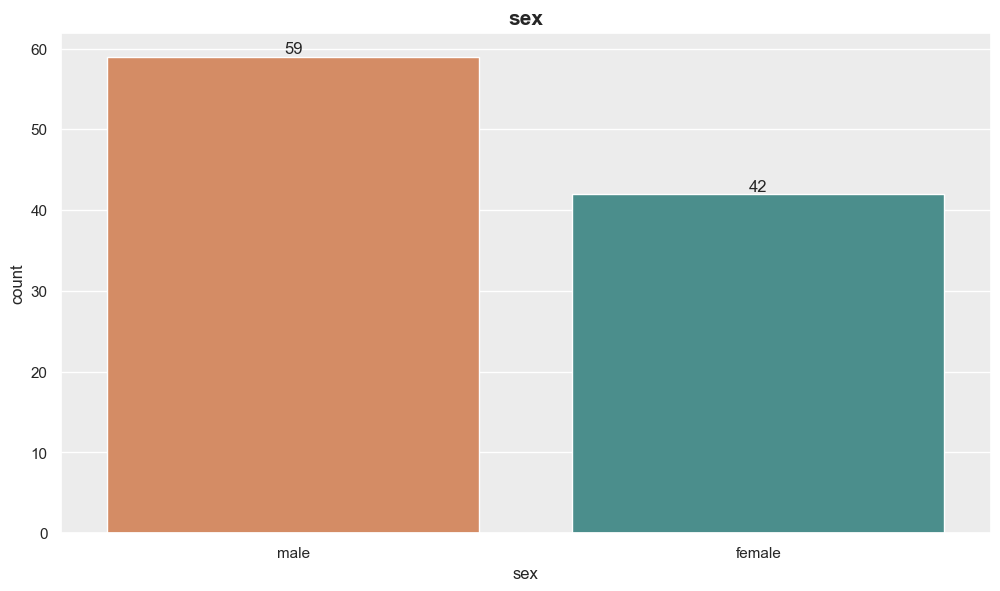

In [187]:
#plotting categorical variables
list_of_cat_features = data[['site_of_recording', 'population_area', 'sex']]
palette              = ['#E68753', '#409996', '#60C3E0', '#E0A060', '#945B22', '#E0C472', '#A3E5FF']

sns.set(rc={'axes.facecolor':'#ECECEC'}) #background color of all plots

for feature in list_of_cat_features:
    plt.figure(figsize = (12,6.5))
    plt.title(feature, fontsize = 15, fontweight = 'bold', ha = 'center')
    ax = sns.countplot(x = data[feature], data = data, order = data[feature].value_counts().index, palette = palette)
    for container in ax.containers:
        ax.bar_label(container)
    plt.show()

AttributeError: 'BoxPlotContainer' object has no attribute 'patches'

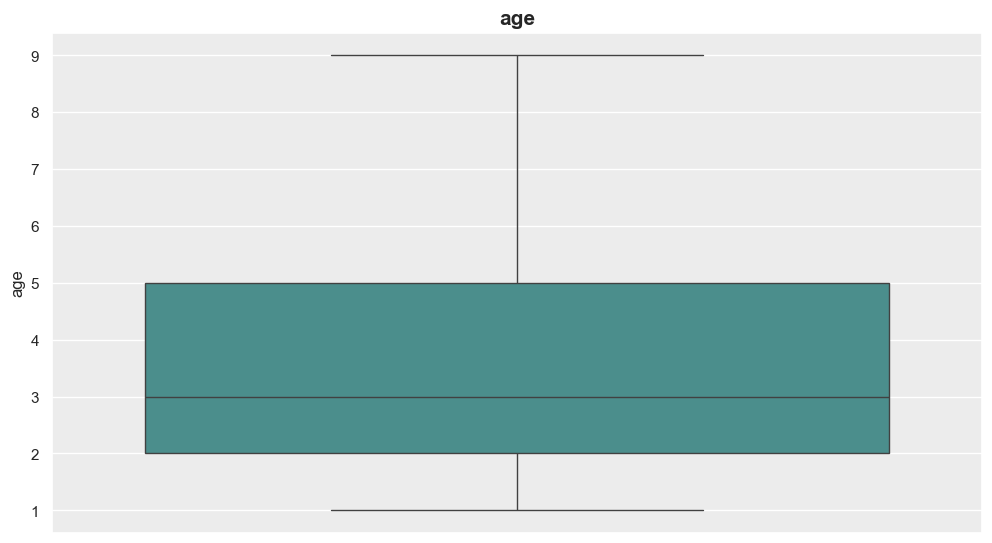

In [188]:
#plotting numerical variables
list_of_num_features = data[['age','hdlngth', 'skullw', 'totlngth','taill', 'footlgth', 'earconch', 'eye', 'chest', 'belly']]

for feature in list_of_num_features:
    plt.figure(figsize=(12,6.5))
    plt.title(feature, fontsize=15, fontweight='bold', ha='center')
    ax = sns.boxplot(y=data[feature], data=data, color='#409996')
    for container in ax.containers:
        ax.bar_label(container)    
    plt.show()
    

In [ ]:
# Calculate correlations
corr = data.corr()

# Plot heatmap
plt.figure(figsize=(20, 12))
sns.heatmap(corr, linewidths=4, annot=True, fmt=".2f", cmap="BrBG")
plt.show()



ValueError: could not convert string to float: 'Victoria'

## Transformation of categorical attributes

In [ ]:
#preparing data for bonus_b section 
data_bonus_b = data

#transform all categorical attributes into numerical using LabelEncoder as a preparation for model implemetation
cat_columns = [cname for cname in data_bonus_b.columns
                        if data_bonus_b[cname].dtype == 'object']

encoder = preprocessing.LabelEncoder()

for col in cat_columns:
    data_bonus_b[col] = encoder.fit_transform(data_bonus_b[col])
    
data_bonus_b.head()


,site_of_recording,population_area,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,0,1,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,1,0,0,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,1,0,0,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,1,0,0,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,1,0,0,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


In [ ]:
#transform all categorical attributes into numerical using LabelEncoder as a preparation for model implemetation
encoder = preprocessing.LabelEncoder()
data['site_of_recording'] = encoder.fit_transform(data['site_of_recording'])
data.head()

,site_of_recording,population_area,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,0,0,1,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,0,0,0,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,0,0,0,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,0,0,0,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,0,0,0,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


In [ ]:
#encoding categorical attributes using .get_dummies() function as a preparation for model implemetation
data = pd.get_dummies(data = data, columns = ['population_area', 'sex'])
data.head()

,site_of_recording,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly,population_area_0,population_area_1,sex_0,sex_1
0,0,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0,True,False,False,True
1,0,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0,True,False,True,False
2,0,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0,True,False,True,False
3,0,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0,True,False,True,False
4,0,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0,True,False,True,False


# Preparation, implementation and evaluation of Linear regression model¶

In [ ]:
#preparation of target variable Age for implementation in ML models 
X = data
X = X.drop('age', axis = 1) #drop target variable from features
y = data['age'] #add target variable
X.columns

Index(['site_of_recording', 'hdlngth', 'skullw', 'totlngth', 'taill',
       'footlgth', 'earconch', 'eye', 'chest', 'belly', 'population_area_0',
       'population_area_1', 'sex_0', 'sex_1'],
      dtype='object')

In [ ]:
X = X.drop(['hdlngth','skullw', 'footlgth', 'earconch'], axis = 1)

In [ ]:
#preparation of train and test data for ML models
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
#feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
#implementing Linear Rgression model
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

## RMSE
Root-mean-squared error/deviation represents standard deviation of prediction errors (also called residuals). It is one of the most popular measures to estimate the accuracy of our forecasting model’s fitted/predicted values versus the actual/observed values. Basically, the lower the number of result of RMSE is (closer to 0), the smaller the area around predicted line and thus the better fit of the given model (Linear regression in this case).


In [ ]:
#RMSE of Age
print(f'RMSE of Age feature:{np.sqrt(mean_squared_error(y_test, y_pred_lr))}')
print(f'Standard Deviation of Age:{data.age.std()}')

RMSE of Age feature:1.7428440717016294
Standard Deviation of Age:1.9151816603338725


## R2 Score
R2 Score is a very popular metric used for evaluating the performance of linear regression models. The closer R2 Score result is to 1, the better predictions our model does.

In [ ]:
#R2 of Age
r2 = r2_score(y_test, y_pred_lr)
print('R2 score of Age for Linear regression model is', r2)

R2 score of Age for Linear regression model is 0.05348808515137504


### Analysing strongest positive correlation among features - head length and skull width of possum
trad. Analisi della correlazione positiva più forte tra le caratteristiche - lunghezza della testa e larghezza del cranio dell'opossum


Since population area and site of recording are obviously very similar to each other, we will analyse the next strongest relationship - head length and skull width of possums.


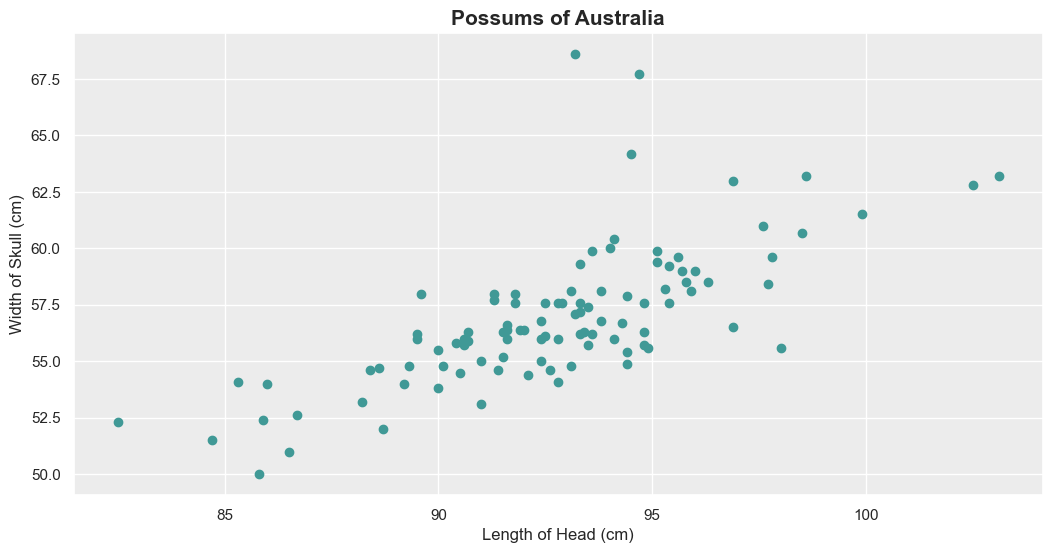

In [ ]:
#analysing relationship between two attributes have the strongest positive correlation: headlength and skullwidth
head_length_values = data.hdlngth.values #prepare attribute hdlngth for scatter plot use
skull_width_values = data.skullw.values #prepare attribute skullw for scatter plot use
plt.figure(figsize=(12.5, 6))
plt.scatter(head_length_values, skull_width_values, color='#409996') # plot the attributes
plt.xlabel("Length of Head (cm)")
plt.ylabel("Width of Skull (cm)")
plt.title("Possums of Australia", size=15, fontweight='bold',  ha='center')
plt.show()

In [ ]:
#preparing data for model implementation
head_length_vector = head_length_values.reshape(-1,1)
x_train, x_test, y_train, y_test = train_test_split(head_length_vector, skull_width_values, test_size=0.3)

Text(0.5, 1.0, 'Training Data')

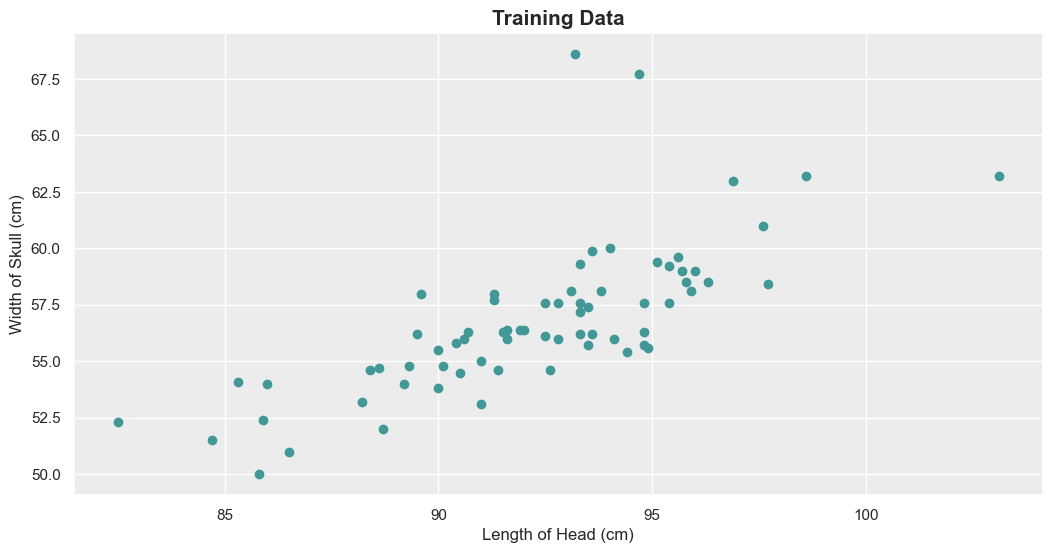

In [ ]:
plt.figure(figsize=(12.5,6))
plt.scatter(x_train, y_train, color='#409996')
plt.xlabel("Length of Head (cm)")
plt.ylabel("Width of Skull (cm)")
plt.title("Training Data", size=15, fontweight='bold', ha='center')

Text(0.5, 1.0, 'Testing Data')

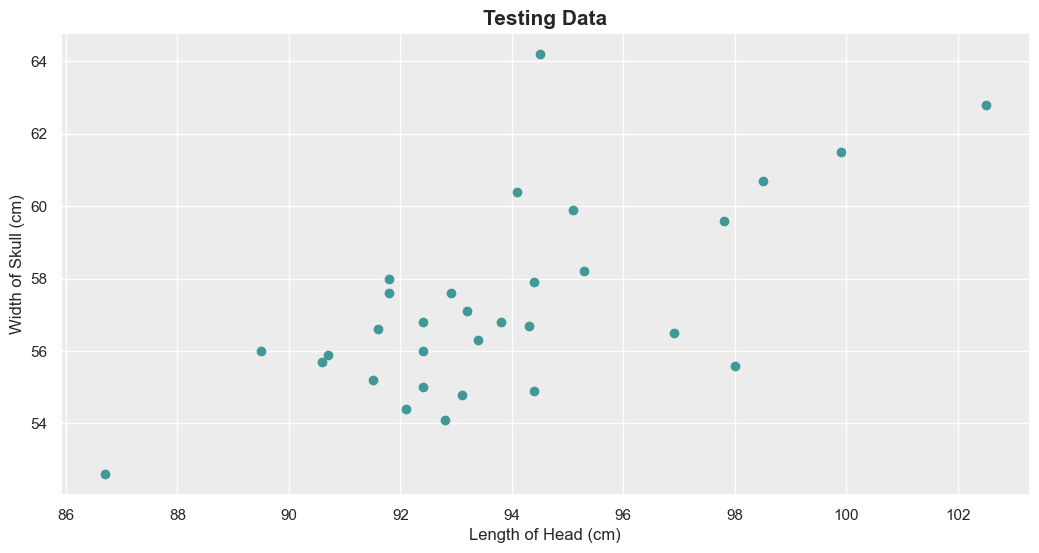

In [ ]:
plt.figure(figsize=(12.5,6))
plt.scatter(x_test, y_test, color='#409996')
plt.xlabel("Length of Head (cm)")
plt.ylabel("Width of Skull (cm)")
plt.title("Testing Data", size=15, fontweight='bold', ha='center')

In [ ]:
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred_lr = lr.predict(x_test)
print(f"Training accuracy {round(lr.score(x_train, y_train)*100,2)} %")
print(f"Testing accuracy {round(lr.score(x_test, y_test)*100,2)} %")

Training accuracy 52.23 %
Testing accuracy 37.22 %


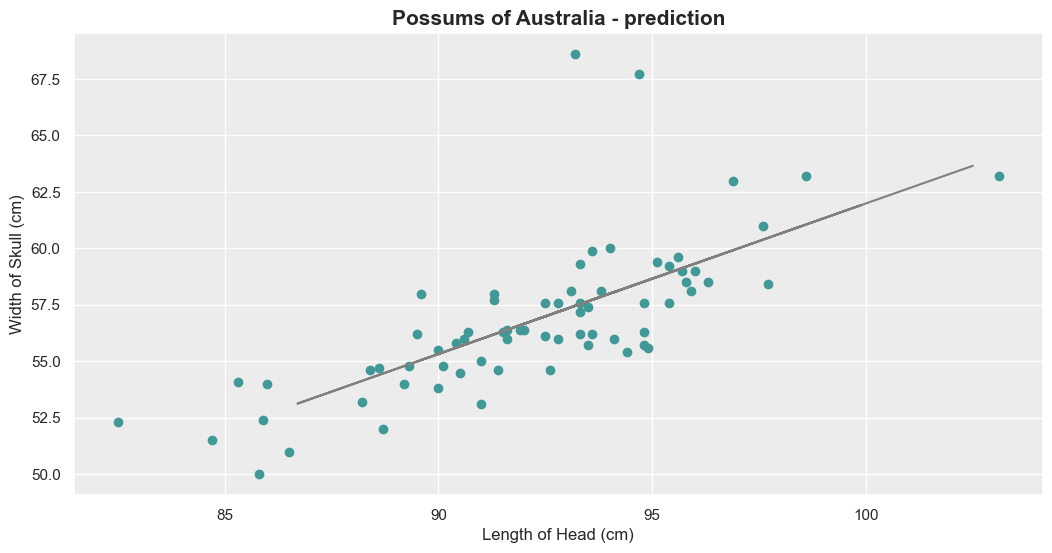

In [ ]:
plt.figure(figsize=(12.5,6))
plt.scatter(x_train, y_train, color='#409996') #scatter plot = real values
plt.plot(x_test, y_pred_lr, color='grey') #line plot = predicted values
plt.xlabel("Length of Head (cm)")
plt.ylabel("Width of Skull (cm)")
plt.title("Possums of Australia - prediction", fontsize = 15, fontweight='bold', ha='center')
plt.show()